In [12]:
from General import functies as functies
from General import classes as classes
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
vtd = functies.vector_to_datapunt

In [2]:
#das 1D-Model
fitparameters = ['phi', 'A', 'C_0', 'omega', 'q']
q = sp.symbols('q')
#met het vorige model
#fitparamdict = {'m1-1': [[-1.0689273830609691, -0.00035, 'S'], [0.11915482565570268, 3.2e-05, 'S'], [-486.28625801149684, -0.048, 'S'], [3.8141064794778394, (2.0, 6.1e-05), 'S'], [7.295393360058406e-09, 9.6e-13, 'S']], 'm1-2': [[3.085462516345724, 0.00058, 'S'], [0.08841055376867005, 4.4e-05, 'S'], [-504.6090451372339, -0.049, 'S'], [3.8175666008290845, (-0.0001, 0.77), 'S'], [6.5396664925246684e-09, 1e-12, 'S']], 'm1-3': [[-3.1937632911730818, -0.00062, 'S'], [0.0832399144484069, 4.5e-05, 'S'], [-434.81698875095157, -0.048, 'S'], [3.815809999380435, 0.79, 'S'], [6.524645471849267e-09, 1e-12, 'S']], 'm2-1': [[0.07609489573295163, 0.00051, 'S'], [0.12501601311761756, 4.8e-05, 'S'], [-213.94998816331463, -0.053, 'S'], [3.8070174550564078, 4.0, 'S'], [5.161871400177434e-09, 1e-12, 'S']], 'm2-2': [[0.9929838995696354, (0.00064, 0.00028), 'S'], [0.13510201665457458, (3.7e-06, 0.00046), 'S'], [-192.71809076348626, (-0.34, -0.0081), 'S'], [3.810282238815174, 3.3, 'S'], [5.6039150218628595e-09, (1e-13, 9.6e-12), 'S']], 'm2-3': [[-2.385402254415131, -0.0014, 'S'], [0.048854385287558505, 6.2e-05, 'S'], [-214.4837731890344, -0.048, 'S'], [3.816369997420442, (1.9, 0.00023), 'S'], [5.435208115207682e-09, 1.1e-12, 'S']], 'm3-1': [[-4.246894101151776, (-0.0033, -0.00072), 'S'], [0.09990616094496357, (5.4e-05, 0.00028), 'S'], [-224.9582913702644, (-0.067, -0.035), 'S'], [3.816288543054232, (-42.0, 2.0), 'S'], [2.1444540463113097e-09, (5.8e-13, 1.8e-12), 'S']], 'm3-2': [[2.2617459219758542, 0.0015, 'S'], [0.1152323509474002, 0.00013, 'S'], [-246.36914812581136, -0.068, 'S'], [3.8131575915834075, (4.1, 2.0), 'S'], [2.591361856751063e-09, 1.4e-12, 'S']], 'm3-3': [[-1.2091115539111228, -0.0018, 'S'], [0.08225185052424794, 0.00013, 'S'], [-220.32135459371273, -0.048, 'S'], [3.8134900558853992, (2.0, 3.9), 'S'], [2.2412612749045444e-09, 1e-12, 'S']], 'm5-1': [[-1.794812888595295, (-0.011, -2.6e-05), 'S'], [0.06982903307669214, (3.8e-06, 0.00027), 'S'], [-278.4189062996526, (-0.0097, -0.24), 'S'], [3.8156146084563867, 4.0, 'S'], [9.540852303932592e-09, (2.8e-12, 4.2e-13), 'S']], 'm5-2': [[0.2903010793019834, 0.00084, 'S'], [0.08780959112166975, 6.3e-05, 'S'], [74.97693225445607, 0.048, 'S'], [3.812334945422661, (2.8, 0.77), 'S'], [4.559498905172977e-09, 1e-12, 'S']], 'm6-1': [[-4.185429463545462, -0.00056, 'S'], [0.09997635223219647, 4.4e-05, 'S'], [83.09350698893203, 0.054, 'S'], [3.8107772291935476, (-11.0, 3.3), 'S'], [6.085533609110799e-09, 1.1e-12, 'S']], 'm6-2': [[-2.206087284941422, -0.00043, 'S'], [0.12711786124331836, 3.9e-05, 'S'], [107.53125955928627, 0.053, 'S'], [4.476646377753726, (2.2, 4.4), 'S'], [5.543990658271674e-09, 9.6e-13, 'S']], 'm6-3': [[-0.3892079281454425, -0.00062, 'S'], [0.10506392756272154, 5.1e-05, 'S'], [90.69101611471169, 0.063, 'S'], [5.079698843418701, (2.7, -0.00018), 'S'], [6.0382167220000244e-09, 1.2e-12, 'S']]}

#met het gereduceerde x_0-model:
fitparamdict = {'m1-1': [[-1.0591973775441228, 0.0020056171120131578, 'S'], [0.109518903942109, 0.0005375223111283924, 'Normaal'], [-522.2492143895824, 0.43019646674513723, 'S'], [3.810252048441806, 3.600000001125, 'S'], [8.16392536381126e-09, 5.620789983718521e-11, 'Normaal']], 'm1-2': [[-0.056873116623286694, 0.002322154172315008, 'S'], [-0.09516181991784649, -0.0005231770731133914, 'Normaal'], [-489.29048205397726, 0.12961867149450346, 'S'], [3.8181917077959318, 1.800000230027763, 'S'], [6.052521802285518e-09, 4.186708670941343e-11, 'Normaal']], 'm1-3': [[-3.191830760714013, 0.005302725714196426, 'S'], [0.053866449985915124, 0.0002800349743694894, 'Normaal'], [-603.4840623796842, 0.6700551917566194, 'S'], [3.8156393319791757, 1.80000001225, 'S'], [1.0577061238993961e-08, 7.454670889548658e-11, 'Normaal']], 'm2-1': [[0.06808675030561971, 0.0017066048165876012, 'S'], [0.12946633833492596, 0.0008075268065432594, 'Normaal'], [-203.58732705872234, 0.3800701119530448, 'S'], [3.8085072976266874, 4.0, 'S'], [4.906166917166121e-09, 3.3770574022947824e-11, 'Normaal']], 'm2-2': [[1.0000054408167904, 0.000951262319236918, 'S'], [0.13679128634053325, 0.000991880148075054, 'Normaal'], [-188.50271082442285, 0.21040199618824912, 'S'], [3.8091407923045173, 3.3, 'S'], [5.4981012433538534e-09, 3.9530229365542475e-11, 'Normaal']], 'm2-3': [[-2.38641109958984, -0.0012, 'S'], [0.05305637835599794, 0.00028039903196228365, 'Normaal'], [-195.79144515352678, 0.07430343195303969, 'S'], [3.8165297977035024, 7.400000005297297, 'S'], [4.987003885907707e-09, 3.432239363704009e-11, 'Normaal']], 'm3-1': [[1.7940883171078161, 0.0640000118828114, 'S'], [0.027963522792734154, 0.001021089475193448, 'Normaal'], [-484.4112857532795, 0.22027482833950865, 'S'], [3.859659924986543, 4.833218389437829, 'S'], [8.371516782921637e-09, 5.760700824982249e-11, 'Normaal']], 'm3-2': [[2.150922065747518, 0.0024596747752497687, 'S'], [0.03913452948154028, 0.00020909230585753838, 'Normaal'], [-488.6416313621658, 0.1722904524342542, 'S'], [3.8277091801946583, 2.1, 'S'], [8.465521711172782e-09, 5.824993346107007e-11, 'Normaal']], 'm3-3': [[-1.202495115476646, -0.0018, 'S'], [0.0490358906325901, 0.00029872868902461905, 'Normaal'], [-289.27613333432, 0.07392563831310488, 'S'], [3.8120135492993388, 4.382921400162226, 'S'], [3.909018948175633e-09, 2.6938358389127637e-11, 'Normaal']], 'm5-1': [[1.322831585492837, 0.01100003072722981, 'S'], [-0.058126169396603894, -0.0010064728727998578, 'Normaal'], [-360.9383970289935, 0.5800144911982803, 'S'], [3.8203332180129137, 4.338202392696772, 'S'], [1.1541315645190965e-08, 7.9603392979256e-11, 'Normaal']], 'm5-2': [[0.278702075820106, 0.0050022494939776846, 'S'], [0.036096751765020224, 0.0003667136590047985, 'Normaal'], [-225.74443520035342, 0.23021728866442678, 'S'], [3.814845121794483, 4.332435804486894, 'S'], [1.1790262647972632e-08, 8.143174060508658e-11, 'Normaal']], 'm6-1': [[2.1188886156190496, 0.000840535543567314, 'S'], [0.11033033306806708, 0.0005551435639252959, 'Normaal'], [110.29413226627425, 0.0810246875958186, 'S'], [3.8077987588747852, 3.4000000017794116, 'S'], [5.437911034010697e-09, 3.837825035473433e-11, 'Normaal']], 'm6-2': [[0.9337518485924422, 0.0016044936896105263, 'S'], [-0.12843054164205386, -0.0009621065151411317, 'Normaal'], [111.72586338097541, 0.2502418829852429, 'S'], [4.476837688581981, 4.919349550499538, 'S'], [5.443395759563868e-09, 4.0014623464593693e-11, 'Normaal']], 'm6-3': [[-0.38783944792555664, 0.0009069729874698585, 'S'], [0.10541550489458401, 0.0010804615016772174, 'Normaal'], [93.33059214548244, 0.24053274205396652, 'S'], [5.079315172543585, 2.700000001155741, 'S'], [5.977481399784963e-09, 4.3676545400740224e-11, 'Normaal']]}
experimenten = fitparamdict.keys()

In [32]:
#de lading in experimenten 1-3,5
q1 = functies.gemiddelde([vtd(fitparamdict['m1-1'][4], q), vtd(fitparamdict['m1-2'][4], q), vtd(fitparamdict['m1-3'][4], q)])
q2 = (vtd(fitparamdict['m2-1'][4], q) + vtd(fitparamdict['m2-2'][4], q) + vtd(fitparamdict['m2-3'][4], q))*(1/3)
q3 = (vtd(fitparamdict['m3-1'][4], q) + vtd(fitparamdict['m3-2'][4], q) + vtd(fitparamdict['m3-3'][4], q))*(1/3)
q5 = (vtd(fitparamdict['m5-1'][4], q) + vtd(fitparamdict['m5-2'][4], q))*(1/2)
q6 = (vtd(fitparamdict['m6-1'][4], q) + vtd(fitparamdict['m6-2'][4], q) + vtd(fitparamdict['m6-3'][4], q))*(1/3)
print('q1',q1)
print('q2',q2)
print('q3',q3)
print('q5',q5)
print('q6',q6)

AttributeError: 'float' object has no attribute 'naam'

In [4]:
#testen of de frequentie wel klopt
L, omega = sp.symbols('L omega')
freqformule = classes.vergelijking(sp.sqrt(9.81/L), [L])
#de eerste reeks proeven
Kordelänge = classes.datapunt(0.66, 0.1, L, 'Uniform',)
freq1 = freqformule.evaluate([Kordelänge], None, omega)
print(freq1)
functies.normaaltest(fitparamdict['m1-3'][4][0], fitparamdict['m1-2'][4])

datapunt: omega = [3.85533868338910, 0.168627335353930, 'Normaal']


0.0

dict_keys(['m1-1', 'm1-2', 'm1-3', 'm2-1', 'm2-2', 'm2-3', 'm3-1', 'm3-2', 'm3-3', 'm5-1', 'm5-2', 'm6-1', 'm6-2', 'm6-3'])


<ErrorbarContainer object of 3 artists>

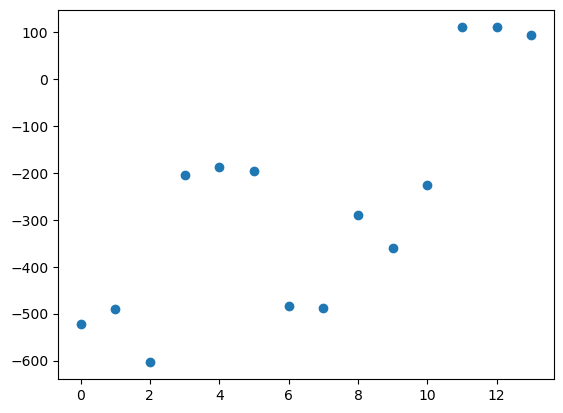

In [5]:
#eens de nulwaarden van het E-veld onderzoeken
constantes = []
errors = []
for experiment in experimenten:
    constantes.append(fitparamdict[experiment][2][0])
    fout = fitparamdict[experiment][2][1]
    if type(fout) == tuple:
        fout = (fout[1] + fout[0])/2
    errors.append(abs(fout))
fig, ax = plt.subplots(1,1)
print(experimenten)
ax.errorbar(range(len(constantes)), constantes, yerr = errors, linestyle = '', marker = 'o')